In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train=pd.read_csv('train.csv', parse_dates=True)

In [4]:
df_train.isna().sum()

id        0
name      0
date      0
market    0
dtype: int64

In [5]:
df_train.dtypes

id         int64
name      object
date      object
market     int64
dtype: object

In [6]:
df_train.shape

(5002, 4)

In [7]:
df_train['date'].astype(str)

0       2013+AC0-08+AC0-01
1       2013+AC0-08+AC0-02
2       2013+AC0-08+AC0-03
3       2013+AC0-08+AC0-04
4       2013+AC0-08+AC0-05
5       2013+AC0-08+AC0-06
6       2013+AC0-08+AC0-07
7       2013+AC0-08+AC0-08
8       2013+AC0-08+AC0-09
9       2013+AC0-08+AC0-10
10      2013+AC0-08+AC0-11
11      2013+AC0-08+AC0-12
12      2013+AC0-08+AC0-13
13      2013+AC0-08+AC0-14
14      2013+AC0-08+AC0-15
15      2013+AC0-08+AC0-16
16      2013+AC0-08+AC0-17
17      2013+AC0-08+AC0-18
18      2013+AC0-08+AC0-19
19      2013+AC0-08+AC0-20
20      2013+AC0-08+AC0-21
21      2013+AC0-08+AC0-22
22      2013+AC0-08+AC0-23
23      2013+AC0-08+AC0-24
24      2013+AC0-08+AC0-25
25      2013+AC0-08+AC0-26
26      2013+AC0-08+AC0-27
27      2013+AC0-08+AC0-28
28      2013+AC0-08+AC0-29
29      2013+AC0-08+AC0-30
               ...        
4972    2018+AC0-01+AC0-31
4973    2018+AC0-02+AC0-01
4974    2018+AC0-02+AC0-02
4975    2018+AC0-02+AC0-03
4976    2018+AC0-02+AC0-04
4977    2018+AC0-02+AC0-05
4

In [8]:
df_test=pd.read_csv('test.csv',infer_datetime_format=True )

In [9]:
df_train.head()

,id,name,date,market
0,0,BTC,2013+AC0-08+AC0-01,190367
1,1,BTC,2013+AC0-08+AC0-02,183766
2,2,BTC,2013+AC0-08+AC0-03,211731
3,3,BTC,2013+AC0-08+AC0-04,226680
4,4,BTC,2013+AC0-08+AC0-05,227272


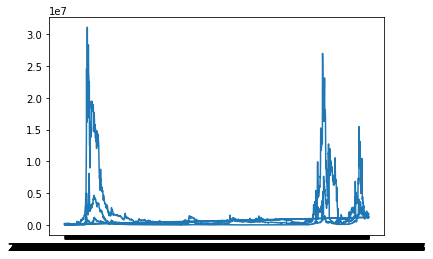

In [10]:
plt.plot(df_train['date'],df_train['market'])

In [11]:
import re

In [23]:
import re
def preprocess_text(txt):
        iter_1 = re.sub("ac\d"," ", txt)
        iter_2 = re.sub("\+"," ", iter_1)
        return iter_2.lower()
    
#.lower - Возвращает копию исходной строки с символами приведёнными к нижнему регистру.

In [24]:
txt_columns = ["date"]

for c in txt_columns:
    df_train[c] = df_train[c].map(preprocess_text)

In [25]:
df_train[["date"]].head()

,date
0,2013 -08 -01
1,2013 -08 -02
2,2013 -08 -03
3,2013 -08 -04
4,2013 -08 -05


In [26]:
df_train.head()

,id,name,date,market
0,0,BTC,2013 -08 -01,190367
1,1,BTC,2013 -08 -02,183766
2,2,BTC,2013 -08 -03,211731
3,3,BTC,2013 -08 -04,226680
4,4,BTC,2013 -08 -05,227272


In [27]:
df_train['date']=pd.to_datetime(df_train['date'])

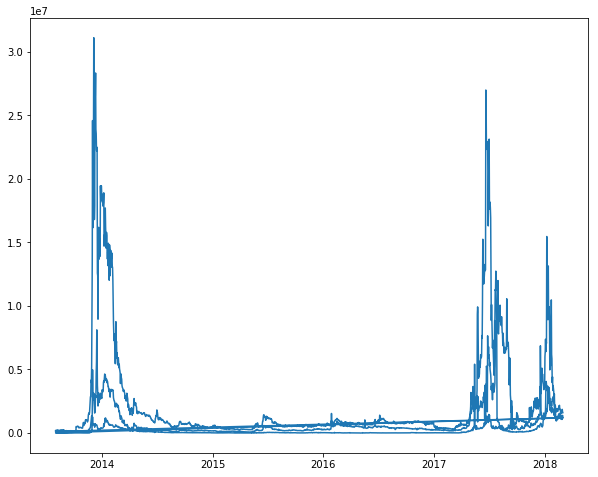

In [28]:
plt.figure(figsize=(10,8))
plt.plot(df_train['date'],df_train['market']);

In [29]:
np.unique(df_train['name'])

array(['BTC', 'ETH', 'MON'], dtype=object)

In [30]:
df_train.tail()

,id,name,date,market
4997,4997,MON,2018-02-25,1579140
4998,4998,MON,2018-02-26,1743510
4999,4999,MON,2018-02-27,1862290
5000,5000,MON,2018-02-28,1674760
5001,5001,MON,2018-03-01,1603110


In [35]:
txt_columns = ["date"]

for c in txt_columns:
    df_test[c] = df_test[c].map(preprocess_text)

In [39]:
txt_columns = ["date"]

for c in txt_columns:
    df_test[c] = df_test[c].map(preprocess_text)

TypeError: expected string or bytes-like object

In [36]:
df_test[["date"]].head()

,date
0,2018 -03 -02
1,2018 -03 -03
2,2018 -03 -04
3,2018 -03 -05
4,2018 -03 -06


In [37]:
df_test.head()

,id,date,name
0,0,2018 -03 -02,BTC
1,1,2018 -03 -03,BTC
2,2,2018 -03 -04,BTC
3,3,2018 -03 -05,BTC
4,4,2018 -03 -06,BTC


In [38]:
df_test['date']=pd.to_datetime(df_test['date'])

In [40]:
df_test.tail()

,id,date,name
268,268,2018-05-27,MON
269,269,2018-05-28,MON
270,270,2018-05-29,MON
271,271,2018-05-30,MON
272,272,2018-05-31,MON


In [41]:
df_train.shape, df_test.shape

((5002, 4), (273, 3))

# Обучаем ПРОРОКА

In [42]:
from fbprophet import Prophet

In [43]:
predictions=273;

In [44]:
predictions

273

In [45]:
df_pr=df_train[['date', 'market']]
df_pr.columns=['ds', 'y']

In [46]:
df_pr.tail()


,ds,y
4997,2018-02-25,1579140
4998,2018-02-26,1743510
4999,2018-02-27,1862290
5000,2018-02-28,1674760
5001,2018-03-01,1603110


In [47]:
m=Prophet()

In [48]:
%%time
m.fit(df_pr)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CPU times: user 3.13 s, sys: 29.5 ms, total: 3.16 s
Wall time: 3.22 s


In [49]:
future=m.make_future_dataframe(periods=273)

In [50]:
future.tail()

,ds
5270,2018-11-25
5271,2018-11-26
5272,2018-11-27
5273,2018-11-28
5274,2018-11-29


In [51]:
forecast=m.predict(future)

In [52]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5270,2018-11-25,2.945214e+06,-1.638964e+06,6.756832e+06,574798.848803,5.740389e+06,-314775.233600,-314775.233600,-314775.233600,34060.628410,34060.628410,34060.628410,-348835.862009,-348835.862009,-348835.862009,0.0,0.0,0.0,2.630439e+06
5271,2018-11-26,2.947110e+06,-1.363103e+06,6.932015e+06,567043.286723,5.765658e+06,-258831.175268,-258831.175268,-258831.175268,4844.372337,4844.372337,4844.372337,-263675.547605,-263675.547605,-263675.547605,0.0,0.0,0.0,2.688279e+06
5272,2018-11-27,2.949005e+06,-8.803161e+05,7.087784e+06,559287.724643,5.790902e+06,-180392.057888,-180392.057888,-180392.057888,-2494.618094,-2494.618094,-2494.618094,-177897.439793,-177897.439793,-177897.439793,0.0,0.0,0.0,2.768613e+06
5273,2018-11-28,2.950901e+06,-1.257847e+06,7.225771e+06,551532.162563,5.815818e+06,-104941.279354,-104941.279354,-104941.279354,-12405.722961,-12405.722961,-12405.722961,-92535.556392,-92535.556392,-92535.556392,0.0,0.0,0.0,2.845960e+06
5274,2018-11-29,2.952797e+06,-7.768403e+05,7.082407e+06,543776.600483,5.839581e+06,-16903.968761,-16903.968761,-16903.968761,-8287.018256,-8287.018256,-8287.018256,-8616.950505,-8616.950505,-8616.950505,0.0,0.0,0.0,2.935893e+06


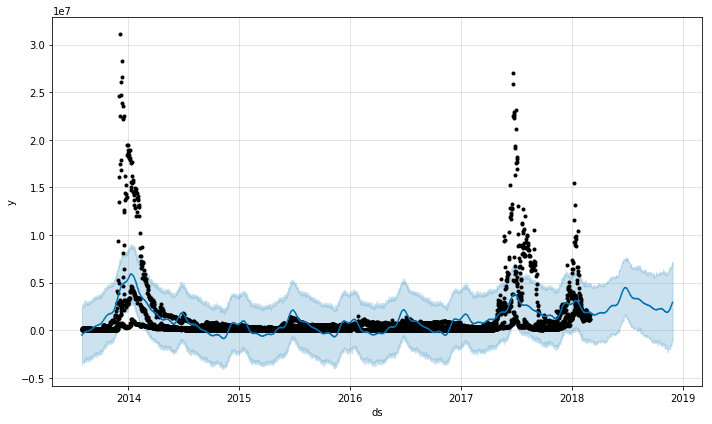

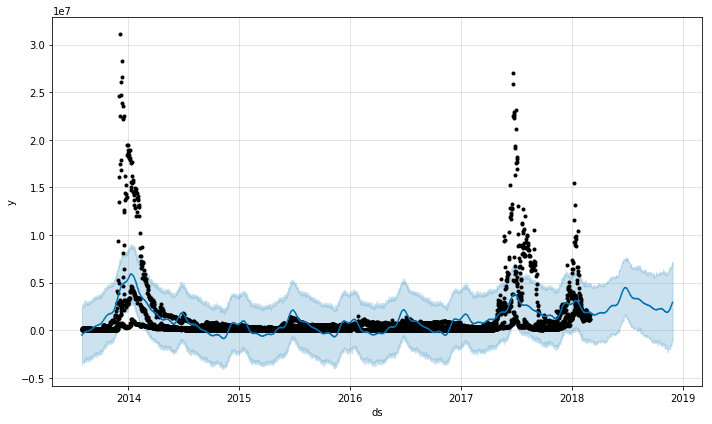

In [53]:
m.plot(forecast)

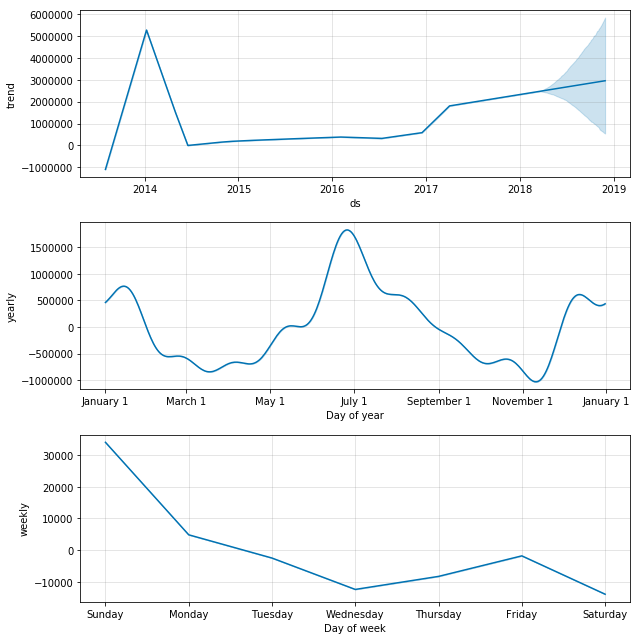

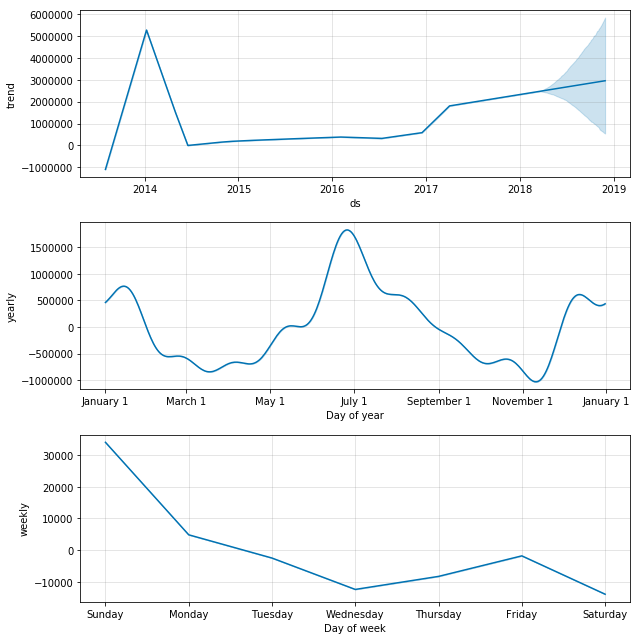

In [54]:
m.plot_components(forecast)

# Оценка качества модели

In [55]:
print(','.join(forecast.columns))

ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat


In [56]:
cmp_df=forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df_pr.set_index('ds'))

In [57]:
cmp_df.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2013-08-01,-495410.222365,-3.611612e+06,2.447079e+06,190367.0
2013-08-01,-495410.222365,-3.611612e+06,2.447079e+06,17368.0
2013-08-01,-495410.222365,-3.611612e+06,2.447079e+06,126306.0
2013-08-01,-495410.222365,-3.557015e+06,2.501962e+06,190367.0
2013-08-01,-495410.222365,-3.557015e+06,2.501962e+06,17368.0


In [61]:
cmp_df.shape

(15239, 6)

In [65]:
cmp_df.tail()

,yhat,yhat_lower,yhat_upper,y,e,p
ds,,,,,,
2018-11-25,2.630439e+06,-1.638964e+06,6.756832e+06,NaN,NaN,NaN
2018-11-26,2.688279e+06,-1.363103e+06,6.932015e+06,NaN,NaN,NaN
2018-11-27,2.768613e+06,-8.803161e+05,7.087784e+06,NaN,NaN,NaN
2018-11-28,2.845960e+06,-1.257847e+06,7.225771e+06,NaN,NaN,NaN
2018-11-29,2.935893e+06,-7.768403e+05,7.082407e+06,NaN,NaN,NaN


In [58]:
cmp_df['e']=cmp_df['y']-cmp_df['yhat']
cmp_df['p']=100*cmp_df['e']/-cmp_df['y']

In [59]:
print('MAPE' , np.mean(abs(cmp_df[-predictions:]['p'])))

print('MAE' , np.mean(abs(cmp_df[-predictions:]['e'])))


MAPE nan
MAE nan


In [60]:

cmp_df2['e'] = cmp_df2['y'] - cmp_df2['yhat']
cmp_df2['p'] = 100*cmp_df2['e']/cmp_df2['y']
np.mean(abs(cmp_df2[-predictions:]['p'])), np.mean(abs(cmp_df2[-predictions:]['e']))

NameError: name 'cmp_df2' is not defined